# Preprocesamiento

In [ ]:
import os
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# df - data frame
df = pd.read_csv('train-balanced-sarcasm.csv')
# dropping empty comment entries
df.dropna(subset=['comment'], inplace=True)

print('Type:')
print('Labels array ',type(df.label))
print('Comments array ',type(df.comment))
print('one comment line ', type(df.comment[0]))
print('Shape:')
print('Labels array ',df.label.shape)
print('Comments array ',df.comment.shape)
print('Two first entries:')
print(df.label[0], df.comment[0])
print(df.label[1], df.comment[1])

Type:
Labels array  <class 'pandas.core.series.Series'>
Comments array  <class 'pandas.core.series.Series'>
one comment line  <class 'str'>
Shape:
Labels array  (1010773,)
Comments array  (1010773,)
Two first entries:
0 NC and NH.
0 You do know west teams play against west teams more than east teams right?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tf_idf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
T = tf_idf_vectorizer.fit(df.comment)
print(len(T.vocabulary_))
print(str(T.vocabulary_)[0:500])

167435
{'nc': 101553, 'and': 11906, 'nh': 102779, 'you': 165906, 'do': 44923, 'know': 83382, 'west': 161290, 'teams': 146122, 'play': 114148, 'against': 9402, 'more': 98525, 'than': 147330, 'east': 48145, 'right': 125662, 'they': 147871, 'were': 161232, 'underdogs': 154217, 'earlier': 48043, 'today': 149437, 'but': 26313, 'since': 134891, 'gronk': 65565, 'announcement': 12362, 'this': 148055, 'afternoon': 9357, 'the': 147462, 'vegas': 157296, 'line': 87772, 'has': 68232, 'moved': 99088, 'to': 149355, '


In [ ]:
# preprocess with nltk
def my_tokenizer(corpus):
    corpus_tokenized = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    sbs = nltk.stem.SnowballStemmer('english', ignore_stopwords=False)
    for comment in corpus:
        words = tokenizer.tokenize(comment)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if not word in stop_words]
        
        cmnt_t = []
        for token in words:
            cmnt_t.append(sbs.stem(token))
            # make a string to be compatible with TfidfVectorizer
            c = ' '.join(cmnt_t)
        # Lemmitize
        #words = [lemmatizer.lemmatize(word) for word in words]
        
        corpus_tokenized.append(c)
    return corpus_tokenized

In [ ]:
df2 = pd.Series(my_tokenizer(df.comment))

In [ ]:
for i in range(10):
    print(df.comment[i])
    print(df2[i], '\n')

T = tf_idf_vectorizer.fit(df2)
print(str(tf_idf_vectorizer))
print(len(T.vocabulary_))
print(str(T.vocabulary_)[0:500])

tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
T = tf_idf_vectorizer.fit(df2)
print(str(tf_idf_vectorizer))
print(len(T.vocabulary_))
print(str(T.vocabulary_)[0:500])

NC and NH.
nc nh 

You do know west teams play against west teams more than east teams right?
you know west team play west team east team right 

They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1
they underdog earlier today sinc gronk announc afternoon vega line move patriot 1 

This meme isn't funny none of the "new york nigga" ones are.
this meme funni none new york nigga one 

I could use one of those tools.
i could use one tool 

I don't pay attention to her, but as long as she's legal I wouldn't kick her out of bed (before she took a load)
i pay attent long legal i kick bed took load 

Trick or treating in general is just weird...
trick treat general weird 

Blade Mastery+Masamune or GTFO!
blade masteri masamun gtfo 

You don't have to, you have a good build, buy games or save it
you good build buy game save 

I would love to see him at lolla.
i would love see lolla 

TfidfVectorizer()
131021
{'nc': 80098, 'nh

In [ ]:
from sklearn.model_selection import train_test_split
# divide into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2, df.label, train_size=0.33)

print((X_train[0:3]))
print("\n")

print((y_train[0:3]))
print("\n")
print((X_test[0:3]))

print("\n")

print((y_test[0:3]))
print("\n")


655324                                 warcraft 2
927295                                  u mad bro
634283    just sure drink water motrin anger issu
dtype: object


655346    0
927335    0
634303    1
Name: label, dtype: int64


1000298    becaus hornet often cruis san diego area anywh...
302852                                                    rt
919119                                 you misspel movi titl
dtype: object


1000346    1
302858     0
919157     0
Name: label, dtype: int64




In [ ]:
# Vetorize the training data set
X_train = tf_idf_vectorizer.fit_transform(X_train)
#print(X_train.shape)
print(X_train[0:3])



  (0, 2162804)	1.0
  (1, 1175262)	0.7597664380157049
  (1, 268189)	0.4237081035025506
  (1, 1175229)	0.4931798887740659
  (2, 1279897)	0.27699234484930013
  (2, 2169775)	0.27699234484930013
  (2, 546743)	0.27699234484930013
  (2, 1905096)	0.27699234484930013
  (2, 1026160)	0.27699234484930013
  (2, 113165)	0.2622510757878252
  (2, 1279896)	0.27699234484930013
  (2, 2169774)	0.27699234484930013
  (2, 546737)	0.22698528097818924
  (2, 1905095)	0.27699234484930013
  (2, 1026159)	0.25034963965366797
  (2, 991567)	0.14312957037666835
  (2, 113126)	0.2001983911233577
  (2, 1279895)	0.2622510757878252
  (2, 2169313)	0.15105721418617585
  (2, 546075)	0.15568911447460665
  (2, 1903500)	0.10446832920597225
  (2, 1023774)	0.12616231586581392


In [ ]:
# Vetorize the test data set
X_test = tf_idf_vectorizer.transform(X_test)
print(X_test.shape)
print(X_test[0:3])

(677218, 2327533)
  (0, 1694112)	0.3679760483358014
  (0, 1694070)	0.30165400784372753
  (0, 1383237)	0.27455898525895966
  (0, 915712)	0.40108066582053825
  (0, 863388)	0.31357595428498547
  (0, 510360)	0.3610966765675475
  (0, 450798)	0.3403860919488052
  (0, 199076)	0.18482486991693017
  (0, 135914)	0.2674405469398042
  (0, 126733)	0.2950967490640807
  (1, 1677016)	1.0
  (2, 2315441)	0.4933155279072011
  (2, 2310390)	0.20405687513377016
  (2, 2034951)	0.32893343220486143
  (2, 1283768)	0.5620961145086695
  (2, 1282793)	0.3114969924589013
  (2, 1261436)	0.44025101993922305


# Procesamiento SVM



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

#from sklearn import svm
#from sklearn.ensemble import BaggingClassifier

# bagging with SVM
# oob Out-Of-Bag


bag_log_reg_svm = LinearSVC()


# bag_log_reg_svm = BaggingClassifier(
#      LinearSVC(), n_estimators=200,
#     max_samples=50000, bootstrap=True, n_jobs=None, oob_score=True)

bag_log_reg_svm.fit(X_train,y_train)
#print('oob_score is ', bag_log_reg_svm.oob_score_)

LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score

bag_reg_svm_pred = bag_log_reg_svm.predict(X_test)
print(str(bag_reg_svm_pred))

accuracy_score(y_test, bag_reg_svm_pred)

[0 1 1 ... 1 1 1]


0.6796570675912336

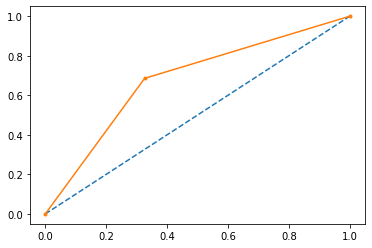

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, bag_reg_svm_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

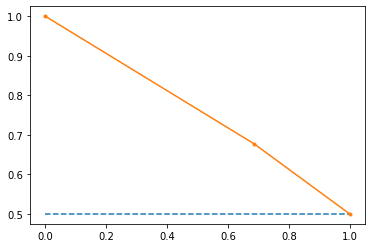

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, bag_reg_svm_pred)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

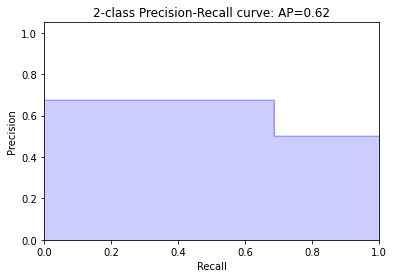

In [ ]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, bag_reg_svm_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

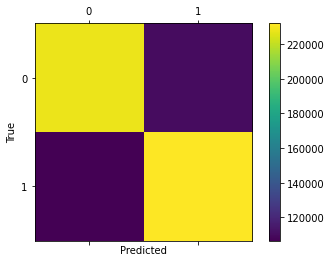

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, bag_log_reg_svm.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision bagging svm: ', precision_score(y_test, bag_reg_svm_pred))
print('Recall bagging svm: ', recall_score(y_test, bag_reg_svm_pred))
print('F1 score bagging svm: ', f1_score(y_test, bag_reg_svm_pred))

Precision bagging svm:  0.6773944995899355
Recall bagging svm:  0.6856512349964402
F1 score bagging svm:  0.6814978594457461
